# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 26.09.2021

Мягкий дедлайн: 23:59MSK 11.10.2021

Жесткий дедлайн: 23:59MSK 14.10.2021

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
#!pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

In [4]:
%config Completer.use_jedi = False

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

Вручную скачала файл с сайта

In [5]:
data = pd.read_csv('hw_2_train.csv')

In [6]:
data.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [8]:
data = data.drop('dropoff_datetime', axis=1)

In [9]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [10]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

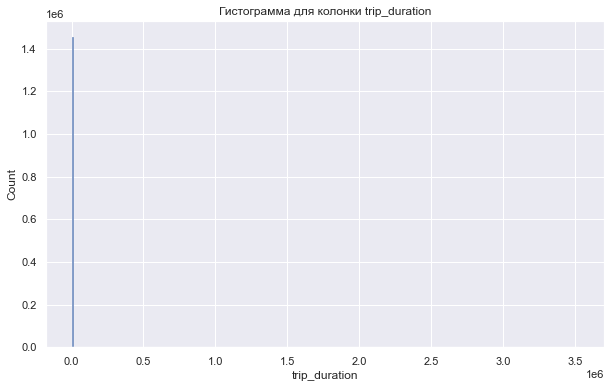

In [11]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data.trip_duration, bins=250)
plt.title('Гистограмма для колонки trip_duration')
plt.show()

Так как график получился неинформативным (из-за слишком большого разброса возможных значений длины поездки и из-за того, что основная часть поездок является не очень продолжительными), построю дополнительно график с использованием логарифмической шкалы

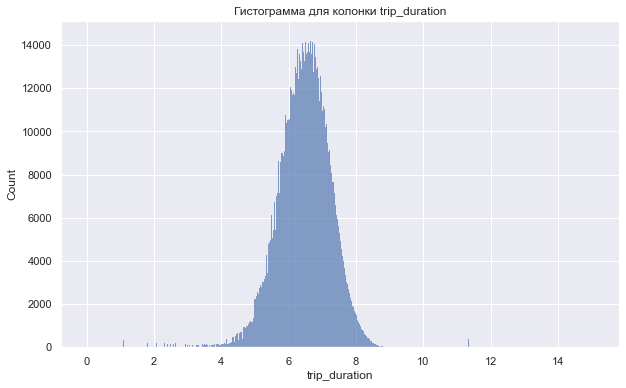

In [12]:
fig = plt.figure(figsize=(10,6))
sns.histplot(np.log(data.trip_duration))
plt.title('Гистограмма для колонки trip_duration')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

По графику видно, что целевая переменная распределена почти нормально, но имеется немалое количестов поездок, которые были сильно корече средней продолжительности, а так же присутствуют долгие поездки.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMSLE, имеет несколько преимуществ по сравнению с RMSE:
* RMSE гораздо более чувствительно к выбросам, чем RMSLE
* RMSLE по сути оценивает относительную оценку, так как можно представить:
$$\log(y_i+1) - \log(a(x_i)+1) = \log\left(\frac{y_i+1}{a(x_i)+1}\right)$$
* RMSE - симметричная функция, потому недопрогноз и перепрогноз штрафуются одинаково, в то же время RMSLE штрафует за недопрогноз сильнее, чем за перепрогноз. Очевидно, что в данной задаче недопрогноз гораздо хуже перепрогноза, потому что недопрогноз череват опазданиями ддля клиентов, наверное, это и есть основная причина выбора авторами данного функционала ошибки для этого соревнования

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [13]:
data['log_trip_duration'] = np.log1p(data.trip_duration)
data = data.drop('trip_duration', axis=1)
data.head(3)

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   

  store_and_fwd_flag  log_trip_duration  
0                  N           6.122493  
1                  N           6.498282  
2                  N           7.661527

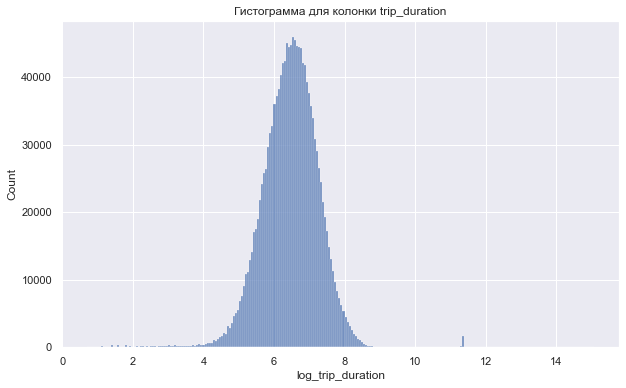

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data.log_trip_duration, bins=250)
plt.title('Гистограмма для колонки trip_duration')
plt.show()

Теперь целевая переменная имеет нормальное распределение, так же присутствуют выбросы

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

Как известно, лучший константный ответ с точки зрения MSE - это среднее значение целефой переменной

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
best_constant = data.log_trip_duration.mean()
print('Train score with best constant: %.5f'
      % mean_squared_error(data.log_trip_duration, best_constant * np.ones(data.shape[0])))

Train score with best constant: 0.63323


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

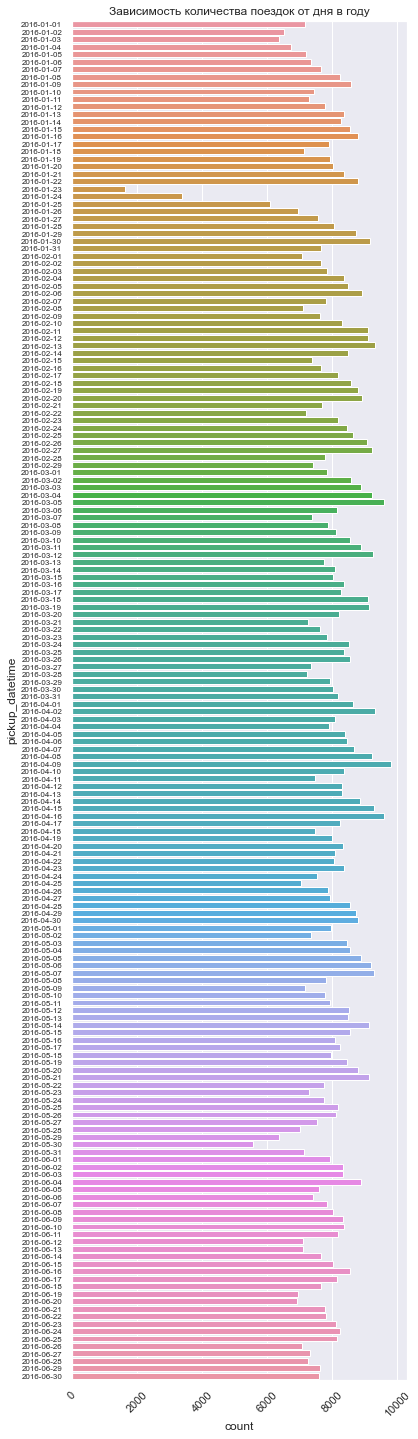

In [17]:
fig = plt.figure(figsize=(6, 25))
ax = fig.add_subplot()
sns.countplot(y=data.pickup_datetime.sort_values().dt.date)
ax.tick_params(axis='y', labelsize=8)
ax.tick_params(axis='x', labelrotation=45)
plt.title('Зависимость количества поездок от дня в году')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

График немного похож на что-то периодическое, видимо пики, которые всё время повторяются это выходные дни, когда люди ездят на такси чаще всего, но выбиваются из общих закономерностей два периода:
1) 23 - 25 января 2016. В эти дни в Нью-Йорке произошёл сильнейший снегопад и 23 числа власти запретили автомобильное движение по улицам города.

2) 29 - 30 мая 2016 (есть небольшой провал, на всякий случай узнаю, что там было). В этот день в аэропорту Нью-Йорка произошёл технический сбой компьютеров из-за чего образовались очереди и массовая задержка рейсов. (я немного не понимаю, почему это повлияло на количество вызовов такси, но тем не менее, кажется, что это так)

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

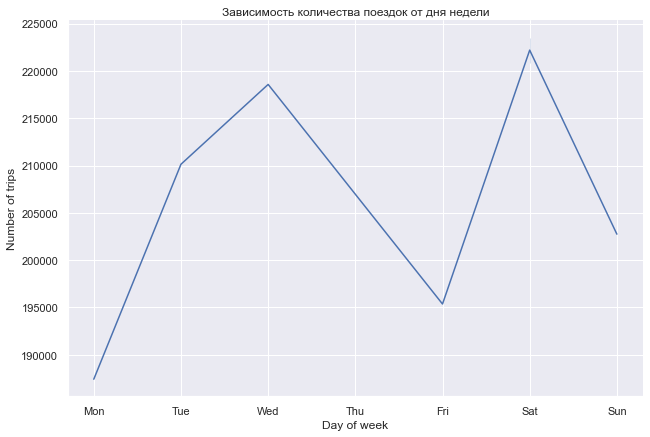

In [18]:
figure = sns.relplot(x=data.pickup_datetime.dt.day_of_week,
                     y=data.groupby(by=data.pickup_datetime.dt.day_of_week).size(),
                     kind='line')
figure.fig.set_size_inches((10, 6))
plt.title('Зависимость количества поездок от дня недели')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Number of trips')
plt.xlabel('Day of week')
plt.show()

In [19]:
len(data.groupby(by=data.pickup_datetime.dt.hour).get_group(19))

90308

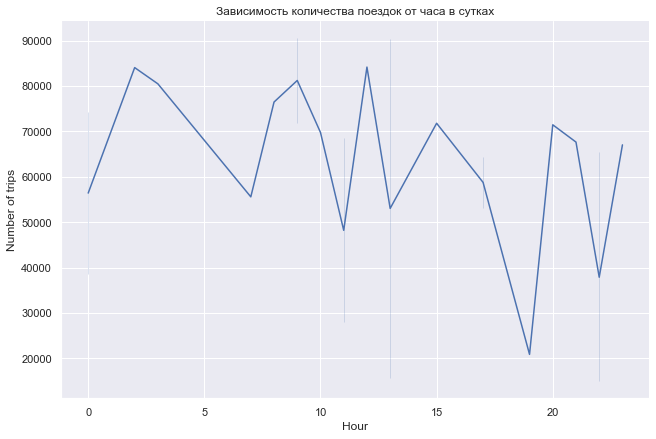

In [20]:
figure = sns.relplot(x=data.pickup_datetime.dt.hour,
                     y=data.groupby(by=data.pickup_datetime.dt.hour).size(),
                     kind='line')
figure.fig.set_size_inches((10, 6))
plt.title('Зависимость количества поездок от часа в сутках')
plt.ylabel('Number of trips')
plt.xlabel('Hour')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [21]:
data['hour'] = data.pickup_datetime.dt.hour
data['month'] = data.pickup_datetime.dt.month
data['day_of_week'] = data.pickup_datetime.dt.day_of_week

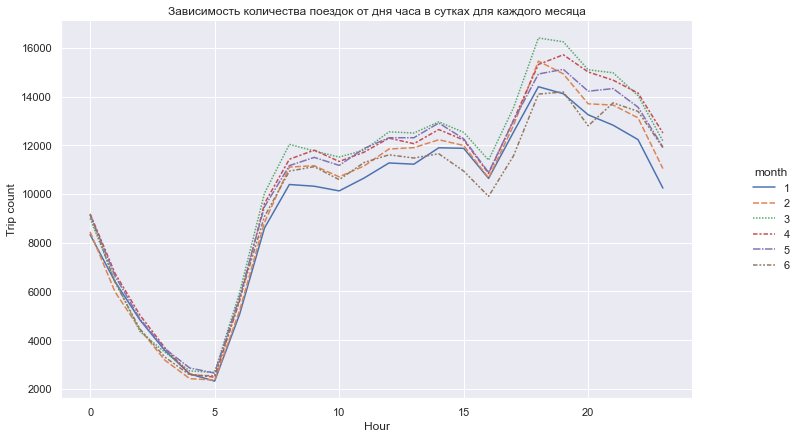

In [22]:
tmp = pd.DataFrame({'count':data.groupby(by=[data.hour,
                                             data.month]).size()}).reset_index()
count_trips_by_month = tmp.pivot(index='hour',
                                 columns='month',
                                 values='count')

figure = sns.relplot(data=count_trips_by_month,
                     kind='line')
figure.fig.set_size_inches((12, 6))
plt.xlabel('Hour')
plt.ylabel('Trip count')
plt.title('Зависимость количества поездок от дня часа в сутках для каждого месяца')
plt.show()

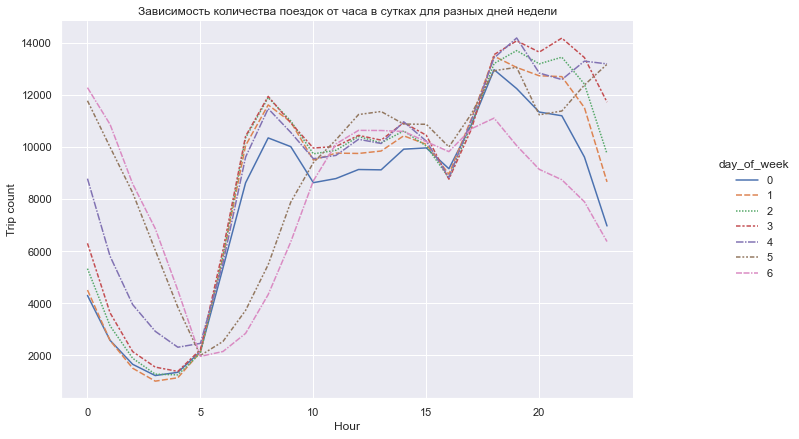

In [23]:
tmp = pd.DataFrame({'count':data.groupby(by=[data.hour,
                                             data.day_of_week]).size()}).reset_index()
count_trips_by_day_of_week = tmp.pivot(index='hour',
                                       columns='day_of_week',
                                       values='count')

figure = sns.relplot(data=count_trips_by_day_of_week,
                     kind='line')
figure.fig.set_size_inches((12, 6))
plt.xlabel('Hour')
plt.ylabel('Trip count')
plt.title('Зависимость количества поездок от часа в сутках для разных дней недели')
plt.show()

Удалю колонки, которые были вспомогательными для построения данных графиков:

In [24]:
data = data.drop(['hour', 'month', 'day_of_week'], axis=1)

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

Два графика выше очень похожи друг на друга, то есть в целом тенданция зависимости количества поездок от часа в сутках очень устойчивая и для разных месяцев и для разных дней недели общая картина выглядит примерно одинаково.

При этом для месяцев распределения количества поездок от часа достаточно похожи друг на друга и от месяца к месяцу всё повторяется. Но для дней недели всё немного иначе,в разные дни мы видим несколько разное число поездок в одно и то же время суток

В воскресенье и субботу ночных поездок больше всего, при этом утренних наоборот меньше. В буднии дни наоборот больше вечерних поездок, но не ночных (по сравнению с воскресеньем). Для всех будних дней ярко выражен пик количества поездок в 8-9 утра.

Для месяцев всё достаточно стабильно, так же виден резкий спад количества поездок в 5 часов утра (когда работающие ещё не едут на работу, а тусовщики уже закончили тусоваться) и пик в вечернее время (когда люди едут с работы либо на тусовки).

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],
                                                    data.log_trip_duration,
                                                    test_size=0.3,
                                                    random_state=12345)

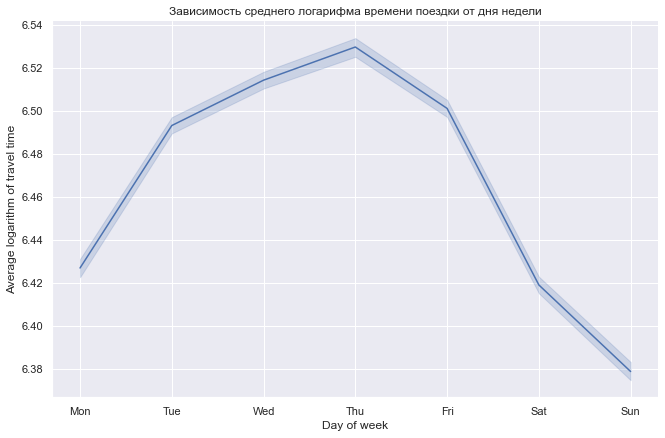

In [27]:
figure = sns.relplot(x=X_train.pickup_datetime.dt.day_of_week, y=y_train, kind='line')
figure.fig.set_size_inches((10, 6))
plt.title('Зависимость среднего логарифма времени поездки от дня недели')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of week')
plt.ylabel('Average logarithm of travel time')
plt.show()

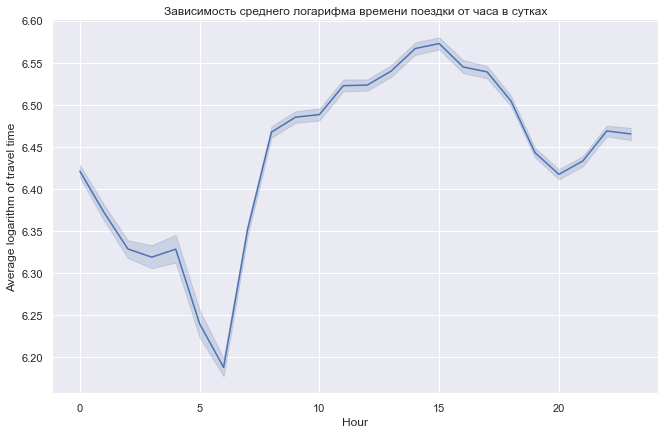

In [28]:
figure = sns.relplot(x=X_train.pickup_datetime.dt.hour, y=y_train, kind='line')
figure.fig.set_size_inches((10, 6))
plt.title('Зависимость среднего логарифма времени поездки от часа в сутках')
plt.xlabel('Hour')
plt.ylabel('Average logarithm of travel time')
plt.show()

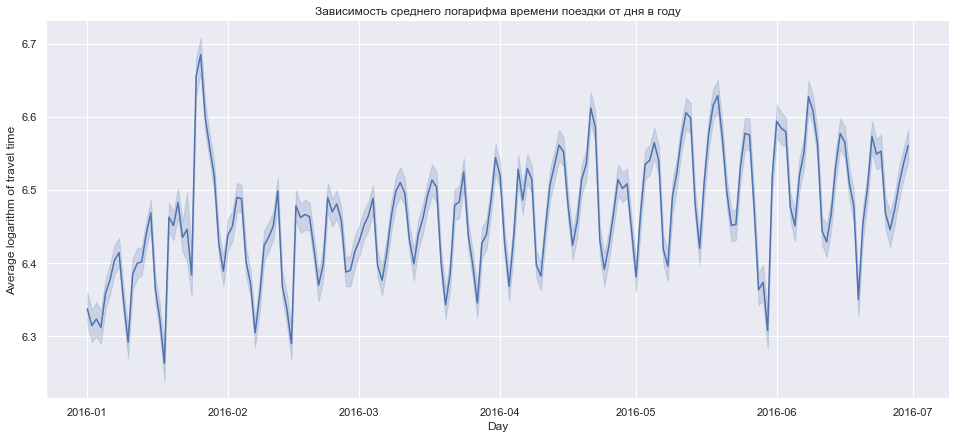

In [29]:
figure = sns.relplot(x=X_train.pickup_datetime.dt.date, y=y_train, kind='line')
figure.fig.set_size_inches((15, 6))
plt.title('Зависимость среднего логарифма времени поездки от дня в году')
plt.xlabel('Day')
plt.ylabel('Average logarithm of travel time')
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

На последнем графике зависимости log_trip_duration от номера дня в году можно заметий тренд возрастания длительности поездки с увеличением номера дня в году.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [30]:
X_train_mod = X_train.copy()
X_train_mod['day_of_week'] = X_train_mod.pickup_datetime.dt.day_of_week
X_train_mod['month'] = X_train_mod.pickup_datetime.dt.month
X_train_mod['hour'] = X_train_mod.pickup_datetime.dt.hour
X_train_mod['day_of_year_number'] = X_train_mod.pickup_datetime.dt.day_of_year

In [31]:
X_train_mod['is_snowfall_period'] = np.zeros(shape=y_train.shape)
X_train_mod.loc[X_train_mod.day_of_year_number.isin([23, 24, 25]), 'is_snowfall_period'] = 1
X_train_mod['is_airport_broke_period'] = np.zeros(shape=y_train.shape)
X_train_mod.loc[X_train_mod.day_of_year_number.isin([150, 151]), 'is_airport_broke_period'] = 1

In [32]:
X_train_mod.head()

id  vendor_id     pickup_datetime  passenger_count  \
203398   id3121553          2 2016-02-27 19:44:44                6   
828302   id1143974          2 2016-06-19 11:30:49                6   
962010   id2864809          2 2016-01-06 15:32:24                1   
1075442  id0068806          2 2016-02-24 19:41:46                1   
344111   id1515809          1 2016-02-24 12:12:50                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
203398         -73.982658        40.771950         -73.984230   
828302         -73.968498        40.761299         -73.990143   
962010         -73.979851        40.781151         -73.967857   
1075442        -73.988205        40.761452         -73.985260   
344111         -73.956398        40.767559         -73.971115   

         dropoff_latitude store_and_fwd_flag  day_of_week  month  hour  \
203398          40.763031                  N            5      2    19   
828302          40.737228                  N            6      6    11   
962010          40.787411                  N            2      1    15   
1075442         40.744633                  N            2      2    19   
344111          40.753757                  N            2      2    12   

         day_of_year_number  is_snowfall_period  is_airport_broke_period  
203398                   58                 0.0                      0.0  
828302                  171                 0.0                      0.0  
962010                    6                 0.0                      0.0  
1075442                  55                 0.0                      0.0  
344111                   55                 0.0                      0.0

In [33]:
X_test_mod = X_test.copy()
X_test_mod['day_of_week'] = X_test_mod.pickup_datetime.dt.day_of_week
X_test_mod['month'] = X_test_mod.pickup_datetime.dt.month
X_test_mod['hour'] = X_test_mod.pickup_datetime.dt.hour
X_test_mod['day_of_year_number'] = X_test_mod.pickup_datetime.dt.day_of_year

In [34]:
X_test_mod['is_snowfall_period'] = np.zeros(shape=y_test.shape)
X_test_mod.loc[X_test_mod.day_of_year_number.isin([23, 24, 25]), 'is_snowfall_period'] = 1
X_test_mod['is_airport_broke_period'] = np.zeros(shape=y_test.shape)
X_test_mod.loc[X_test_mod.day_of_year_number.isin([150, 151]), 'is_airport_broke_period'] = 1

In [35]:
X_test_mod.head()

id  vendor_id     pickup_datetime  passenger_count  \
676091   id3159139          1 2016-05-15 02:27:17                1   
259910   id2239505          2 2016-06-01 12:20:08                1   
1953     id3478777          1 2016-04-24 15:52:41                1   
1220368  id3115554          2 2016-02-09 07:32:23                6   
581265   id2075806          2 2016-05-26 02:05:09                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
676091         -73.982048        40.727985         -73.977142   
259910         -73.974159        40.762939         -73.976540   
1953           -73.961739        40.811150         -73.973663   
1220368        -73.967339        40.766239         -73.956276   
581265         -73.999649        40.728306         -73.996376   

         dropoff_latitude store_and_fwd_flag  day_of_week  month  hour  \
676091          40.733807                  N            6      5     2   
259910          40.759239                  N            2      6    12   
1953            40.757576                  N            6      4    15   
1220368         40.784359                  N            1      2     7   
581265          40.737839                  N            3      5     2   

         day_of_year_number  is_snowfall_period  is_airport_broke_period  
676091                  136                 0.0                      0.0  
259910                  153                 0.0                      0.0  
1953                    115                 0.0                      0.0  
1220368                  40                 0.0                      0.0  
581265                  147                 0.0                      0.0

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

In [36]:
X_train_mod.day_of_year_number.max()

182

In [37]:
X_train_mod.shape[0]

1021050

Считаю, что день недели, месяц, час и номер дня в году нужно рассматривать как категориальные признаки, так как мы не наблюдаем линейной зависимости длительности поездки от этих величин (то есть нужно использовать именно OneHotEncoder). Как я писала выше, на графике зависимости log_trip_duration от дня в году наблюдается тренд возрастания, но тем не менее, сам график постоянно 'петляет' вверх и вниз, поэтому считааю, что лучше этот признак тоже закодировать с помощью OneHotEncoder.

Так как у нас достаточно много данных для обучения (а именно 1021050 строк в таблице), то при кодировании всех выше перечисленных признаков с помощью OneHotEncoder мы получим 7 + 5 + 24 + 182 = 218 признаков, что гораздо меньше, чем число объектов для обучения, то есть переобучений из-за этого быть не должно.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [38]:
X_train_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021050 entries, 203398 to 77285
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   id                       1021050 non-null  object        
 1   vendor_id                1021050 non-null  int64         
 2   pickup_datetime          1021050 non-null  datetime64[ns]
 3   passenger_count          1021050 non-null  int64         
 4   pickup_longitude         1021050 non-null  float64       
 5   pickup_latitude          1021050 non-null  float64       
 6   dropoff_longitude        1021050 non-null  float64       
 7   dropoff_latitude         1021050 non-null  float64       
 8   store_and_fwd_flag       1021050 non-null  object        
 9   day_of_week              1021050 non-null  int64         
 10  month                    1021050 non-null  int64         
 11  hour                     1021050 non-null  int64         
 1

In [39]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [40]:
cat_features = ['day_of_week','month','hour']
num_features = ['day_of_year_number']

In [41]:
column_transformer_first = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('scaling', StandardScaler(), num_features)
])

pipeline_first = Pipeline([
    ('column_transformer', column_transformer_first),
    ('ridge_reg', Ridge())
])

model_first = pipeline_first.fit(X_train_mod.loc[:,'day_of_week':'is_airport_broke_period'],
                                  y_train)
y_pred_train_first = model_first.predict(X_train_mod.loc[:,'day_of_week':'is_airport_broke_period'])
y_pred_test_first = model_first.predict(X_test_mod.loc[:,'day_of_week':'is_airport_broke_period'])

print('Train RMSE: %.5f' % mean_squared_error(y_train, y_pred_train_first, squared=False))
print('Test RMSE: %.5f' % mean_squared_error(y_test, y_pred_test_first, squared=False))

Train RMSE: 0.78915
Test RMSE: 0.78832


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [42]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [43]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [44]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

На карте можно выделить три основных области:
* центр города (вокруг имеются "шумы", особенно на второй карте), люди чаще выезжают из центра в окраину, чем наоборот, но основные поездки сконцентрированы непосредственно в центре
* точка правее и ниже центра карты, это аэропорт (John F. Kennedy International Airport) и туда так же часто совершаются поездки
* точка правее, но ближе к Манхэттену - ещё один аэропорт (LaGuardia Airport Redevelopment)

PS, сильно надеюсь, что правильно поняла что за третья точка, так как для этого пришолсь много раз перезапускать ячейки с картами и плюс додумывать самой, так как из рисунков это совсем не очевидно, даже если даже если запускать с самплом на 3к.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [45]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h * 1000  # чтобы считать расстояние в метрах, а скорость в м/с

In [46]:
X_train_mod.loc[:, 'haversine'] = haversine_array(X_train_mod['pickup_latitude'].values,
                                                  X_train_mod['pickup_longitude'].values,
                                                  X_train_mod['dropoff_latitude'].values,
                                                  X_train_mod['dropoff_longitude'].values)

In [47]:
X_test_mod.loc[:, 'haversine'] = haversine_array(X_test_mod['pickup_latitude'].values,
                                                 X_test_mod['pickup_longitude'].values,
                                                 X_test_mod['dropoff_latitude'].values,
                                                 X_test_mod['dropoff_longitude'].values)

In [48]:
X_train_mod.head()

id  vendor_id     pickup_datetime  passenger_count  \
203398   id3121553          2 2016-02-27 19:44:44                6   
828302   id1143974          2 2016-06-19 11:30:49                6   
962010   id2864809          2 2016-01-06 15:32:24                1   
1075442  id0068806          2 2016-02-24 19:41:46                1   
344111   id1515809          1 2016-02-24 12:12:50                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
203398         -73.982658        40.771950         -73.984230   
828302         -73.968498        40.761299         -73.990143   
962010         -73.979851        40.781151         -73.967857   
1075442        -73.988205        40.761452         -73.985260   
344111         -73.956398        40.767559         -73.971115   

         dropoff_latitude store_and_fwd_flag  day_of_week  month  hour  \
203398          40.763031                  N            5      2    19   
828302          40.737228                  N            6      6    11   
962010          40.787411                  N            2      1    15   
1075442         40.744633                  N            2      2    19   
344111          40.753757                  N            2      2    12   

         day_of_year_number  is_snowfall_period  is_airport_broke_period  \
203398                   58                 0.0                      0.0   
828302                  171                 0.0                      0.0   
962010                    6                 0.0                      0.0   
1075442                  55                 0.0                      0.0   
344111                   55                 0.0                      0.0   

           haversine  
203398   1000.514474  
828302   3238.568483  
962010   1226.440018  
1075442  1886.567422  
344111   1972.722753

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [49]:
X_train_mod.haversine.min()

0.0

Так как существуют нулевые значения в колонке расстояния, чтобы избежать бесконечности в колонке log_haversine, запишу в эту колонку логарифм от haversine + 1

In [50]:
X_train_mod['log_haversine'] = np.log(X_train_mod['haversine'] + 1)
X_test_mod['log_haversine'] = np.log(X_test_mod['haversine'] + 1)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

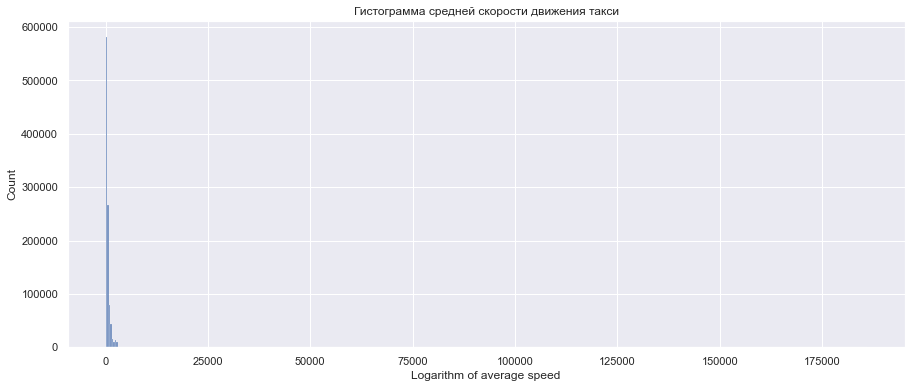

In [51]:
fig = plt.figure(figsize=(15,6))
sns.histplot(data=(X_train_mod['haversine'] / y_train), bins=500)
plt.title('Гистограмма средней скорости движения такси')
plt.xlabel('Logarithm of average speed')
plt.show()

Видно, что чаще всего скорость была не слишком большой, наверное это связано с тем, что большая часть поездок проходила именно в центр, где не слишком широкие улицы, где бывают пробки и тд.
Но график получился не совсем репрезентативным, так как видно, что в выборке присутствуют поездки, скорость которых значительно отличалась (в большую сторону) от скорости большинства поездок, наверное, это поездки как раз в аэропорт либо в отдалённые от цера местности, где нет пробок и улицы пошире.
Так же это могут быть ошибочные данные, длительность которые по ошибке была зафиксирована короче действительной длительности, тогда это можно считать за выбросы.

Построю дополнительно ещё один график, с повторно прологарифмированной скоростью, чтобы хоть что-то на нём увидеть:

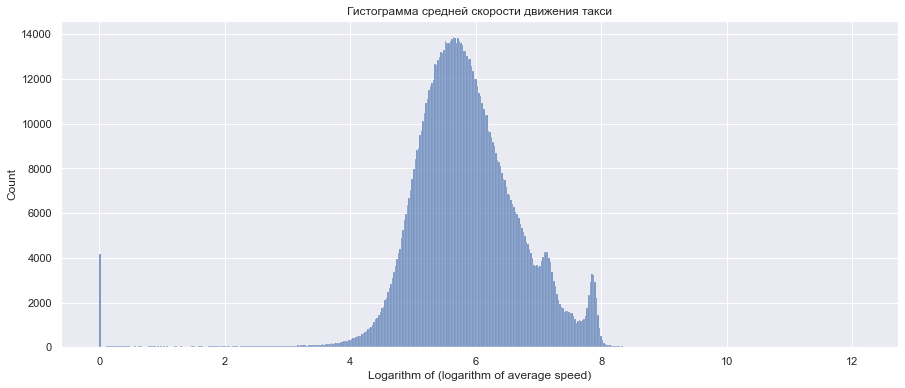

In [52]:
fig = plt.figure(figsize=(15,6))
sns.histplot(np.log((X_train_mod['haversine'] / y_train) + 1), bins=500)
plt.title('Гистограмма средней скорости движения такси')
plt.xlabel('Logarithm of (logarithm of average speed)')
plt.show()

График логарифма от логарифма скорости, может и странная вещь, но за то видно, что логарифм скорости распределён нормально)))

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

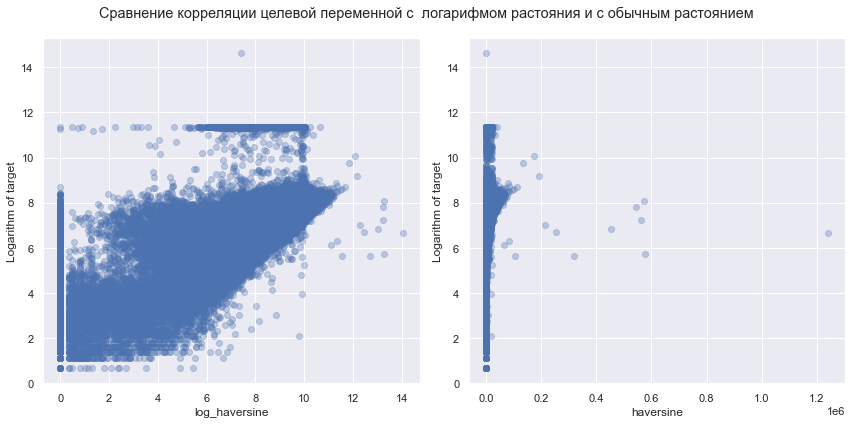

In [53]:
fig, axs = plt.subplots(figsize=(12,6), ncols=2)
for i, feature in enumerate(['log_haversine', 'haversine']):
    axs[i].scatter(x=X_train_mod[feature], y=y_train, alpha=0.3)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Logarithm of target')

fig.suptitle(
    'Сравнение корреляции целевой переменной с логарифмом растояния и с обычным растоянием'
)
plt.tight_layout()

Посмотрю на этот же график поподробнее, выкинув из него слишком долгие поездки:

In [54]:
mask = (X_train_mod.haversine < 200000)

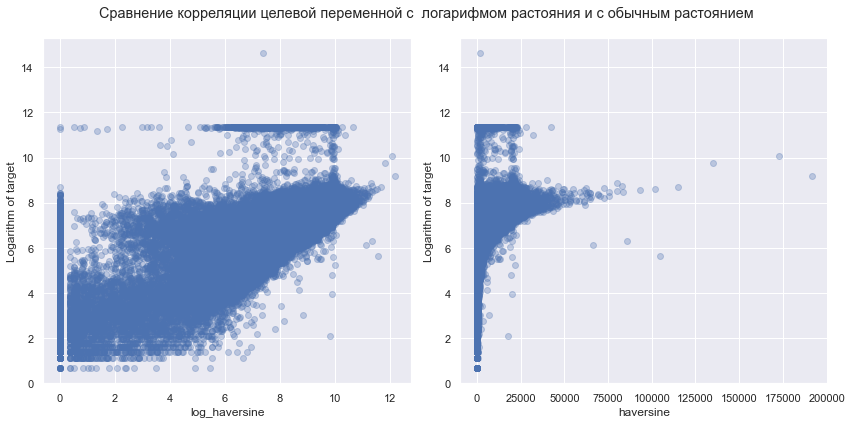

In [55]:
fig, axs = plt.subplots(figsize=(12,6), ncols=2)
for i, feature in enumerate(['log_haversine', 'haversine']):
    axs[i].scatter(x=X_train_mod.loc[mask, feature], y=y_train[mask], alpha=0.3)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Logarithm of target')

fig.suptitle(
    'Сравнение корреляции целевой переменной с  логарифмом растояния и с обычным растоянием'
)
plt.tight_layout()

Видно, что логарифм расстояния коррелирует с целевой переменной лучше, чем обычное расстояние. Зависимость более похожа на линейную.

В особенности по первому графику можно сказать, что обучать линейную модель по haversine будет хуже, чем по log_haversine, так как для обучения мы будем использовать квадратичную функцию потерь, а она сильно реагирует на выбросы, наличие которых мы тут как раз и наблюдаем. Но на графике от log_haversine выбросы не так ярко выражены, как на графике от haversine, так как логарифм уменьшает порядок.

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [56]:
speed = X_train_mod['haversine'] / y_train
mask_speed_quantile = (speed < np.quantile(speed, 0.95))

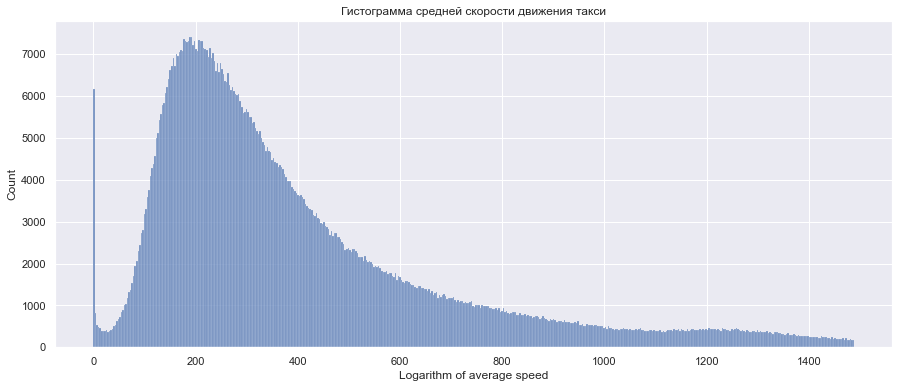

In [57]:
fig = plt.figure(figsize=(15,6))
sns.histplot(
    data=(X_train_mod.loc[mask_speed_quantile, 'haversine'] / y_train[mask_speed_quantile]),
    bins=500
)
plt.title('Гистограмма средней скорости движения такси')
plt.xlabel('Logarithm of average speed')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [58]:
X_train_mod['speed'] = speed

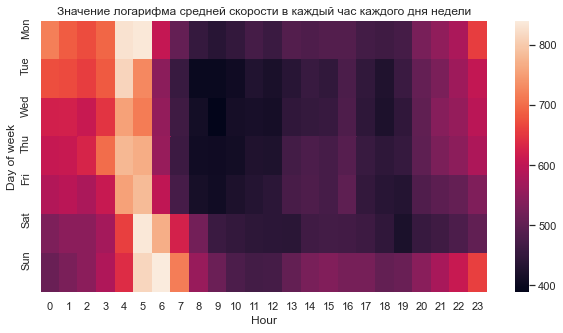

In [59]:
tmp = pd.DataFrame(
    {'mean_speed': X_train_mod.groupby(by=[X_train_mod.day_of_week,
                                           X_train_mod.hour])['speed'].mean()}
).reset_index()
hour_day_of_week = tmp.pivot(index='day_of_week',
                             columns='hour',
                             values='mean_speed')

fig = plt.figure(figsize=(10, 5))
sns.heatmap(data=hour_day_of_week)
plt.yticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Hour')
plt.ylabel('Day of week')
plt.title('Значение логарифма средней скорости в каждый час каждого дня недели')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [60]:
X_train_mod = X_train_mod.drop('speed', axis=1)

In [61]:
X_test_mod.head(3)

id  vendor_id     pickup_datetime  passenger_count  \
676091  id3159139          1 2016-05-15 02:27:17                1   
259910  id2239505          2 2016-06-01 12:20:08                1   
1953    id3478777          1 2016-04-24 15:52:41                1   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
676091        -73.982048        40.727985         -73.977142   
259910        -73.974159        40.762939         -73.976540   
1953          -73.961739        40.811150         -73.973663   

        dropoff_latitude store_and_fwd_flag  day_of_week  month  hour  \
676091         40.733807                  N            6      5     2   
259910         40.759239                  N            2      6    12   
1953           40.757576                  N            6      4    15   

        day_of_year_number  is_snowfall_period  is_airport_broke_period  \
676091                 136                 0.0                      0.0   
259910                 153                 0.0                      0.0   
1953                   115                 0.0                      0.0   

          haversine  log_haversine  
676091   768.019456       6.645116  
259910   457.694473       6.128384  
1953    6041.125411       8.706511

Значение скорости нельзя использовать во время обучания, так как его мы получили для тренировочной выборки с использование целевой переменной, следовательно этот признак мы не сможем получить ни на каком новом объекте.

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

Самую низкую скорость движения мы наблюдаем в утренне и вечернее время рабочих дней, то есть с понедельника по пятницу с 8 до 11 (или даже 12) и с 17 до 19. В принципе, такой результат ожидаем для такого города как Нью-Йорк. Этот результат согласуется с нашим реальным жизненым опытом.

В выходные же дни низкую скорость движения мы наблюдаем чуть позже, а именно с 10 до 13.

Самую высокую скорость движения, а как следствие и отсутствие пробок мы наблюдаем в будние дни в 4-5 утра, а в выходные дни в 5-6 утра. Это тоже можно объяснить логически. Просто в будние дни большому числу людей на следующий день вставать на работу, поэтому эта большая часть людей уже спит.

Отдельно можно выделить субботу. В этот день так же присутствуют и вечерние пробки с 18 до 22. В это время, скорее всего все работяги едут на ночные тусы.

In [62]:
X_train_mod['is_traffic_jams'] = np.zeros(y_train.shape)
X_train_mod.loc[((X_train_mod['day_of_week'].isin(list(range(5)))) &
                (X_train_mod['hour'].isin(list(range(8, 13)))
                 |
                 X_train_mod['hour'].isin(list(range(17, 20))))),'is_traffic_jams'] = 1
X_train_mod.loc[((X_train_mod['day_of_week'].isin(list(range(6, 8)))) &
                (X_train_mod['hour'].isin(list(range(10, 14))))),'is_traffic_jams'] = 1
X_train_mod.loc[((X_train_mod['day_of_week'] == 5) &
                (X_train_mod['hour'].isin(list(range(18, 23))))),'is_traffic_jams'] = 1

X_train_mod['is_free_roads'] = np.zeros(y_train.shape)
X_train_mod.loc[((X_train_mod['day_of_week'].isin(list(range(5)))) &
                (X_train_mod['hour'].isin(list(range(4, 6))))),'is_free_roads'] = 1
X_train_mod.loc[((X_train_mod['day_of_week'].isin(list(range(5, 7)))) &
                (X_train_mod['hour'].isin(list(range(5, 7))))),'is_free_roads'] = 1

Сделаю то же самое для тестовой выборки:

In [63]:
X_test_mod['is_traffic_jams'] = np.zeros(y_test.shape)
X_test_mod.loc[((X_test_mod['day_of_week'].isin(list(range(5)))) &
                (X_test_mod['hour'].isin(list(range(8, 13)))
                 |
                 X_test_mod['hour'].isin(list(range(17, 20))))),'is_traffic_jams'] = 1
X_test_mod.loc[((X_test_mod['day_of_week'].isin(list(range(6, 8)))) &
                (X_test_mod['hour'].isin(list(range(10, 14))))),'is_traffic_jams'] = 1
X_test_mod.loc[((X_test_mod['day_of_week'] == 5) &
                (X_test_mod['hour'].isin(list(range(18, 23))))),'is_traffic_jams'] = 1

X_test_mod['is_free_roads'] = np.zeros(y_test.shape)
X_test_mod.loc[((X_test_mod['day_of_week'].isin(list(range(5)))) &
                (X_test_mod['hour'].isin(list(range(4, 6))))),'is_free_roads'] = 1
X_test_mod.loc[((X_test_mod['day_of_week'].isin(list(range(5, 7)))) &
                (X_test_mod['hour'].isin(list(range(5, 7))))),'is_free_roads'] = 1

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

Для аэропорта имени Кеннеди нашла координаты его местоположения в интернете.
* Широта: 40.633333000000
* Долгота: -73.783333000000

Буду считать, что поездка относится к этому аэропорту, если точка прибытия или точка отъезда находится в радиусе 4-ёх км от этих координат

In [64]:
Kennedy_airport_latitude = np.full(y_train.shape, 40.633333000000)
Kennedy_airport_longitude = np.full(y_train.shape, -73.783333000000)
X_train_mod['is_Kennedy_airport'] = np.zeros(y_train.shape)

X_train_mod.loc[(haversine_array(X_train_mod['pickup_latitude'].values,
                                 X_train_mod['pickup_longitude'].values,
                                 Kennedy_airport_latitude,
                                 Kennedy_airport_longitude) <= 4000),
                'is_Kennedy_airport'] = 1
X_train_mod.loc[(haversine_array(X_train_mod['dropoff_latitude'].values,
                                 X_train_mod['dropoff_longitude'].values,
                                 Kennedy_airport_latitude,
                                 Kennedy_airport_longitude) <= 4000),
                'is_Kennedy_airport'] = 1

То же самое для тестовой выборки:

In [65]:
Kennedy_airport_latitude = np.full(y_test.shape, 40.633333000000)
Kennedy_airport_longitude = np.full(y_test.shape, -73.783333000000)
X_test_mod['is_Kennedy_airport'] = np.zeros(y_test.shape)

X_test_mod.loc[(haversine_array(X_test_mod['pickup_latitude'].values,
                                X_test_mod['pickup_longitude'].values,
                                Kennedy_airport_latitude,
                                Kennedy_airport_longitude) <= 4000),
                'is_Kennedy_airport'] = 1
X_test_mod.loc[(haversine_array(X_test_mod['dropoff_latitude'].values,
                                X_test_mod['dropoff_longitude'].values,
                                Kennedy_airport_latitude,
                                Kennedy_airport_longitude) <= 4000),
                'is_Kennedy_airport'] = 1

Сделаю всё тоже самое для аэропорта Ла-Гвардия сделаю всё тоже самое.
* Широта: 40.77441
* Долгота: -73.87329

In [66]:
LaGuardia_airport_latitude = np.full(y_train.shape, 40.77441)
LaGuardia_airport_longitude = np.full(y_train.shape, -73.87329)
X_train_mod['is_LaGuardia_airport'] = np.zeros(y_train.shape)

X_train_mod.loc[(haversine_array(X_train_mod['pickup_latitude'].values,
                                 X_train_mod['pickup_longitude'].values,
                                 LaGuardia_airport_latitude,
                                 LaGuardia_airport_longitude) <= 4000),
                'is_LaGuardia_airport'] = 1
X_train_mod.loc[(haversine_array(X_train_mod['dropoff_latitude'].values,
                                 X_train_mod['dropoff_longitude'].values,
                                 LaGuardia_airport_latitude,
                                 LaGuardia_airport_longitude) <= 4000),
                'is_LaGuardia_airport'] = 1

То же самое для тестовой выборки:

In [67]:
LaGuardia_airport_latitude = np.full(y_test.shape, 40.77441)
LaGuardia_airport_longitude = np.full(y_test.shape, -73.87329)
X_test_mod['is_LaGuardia_airport'] = np.zeros(y_test.shape)

X_test_mod.loc[(haversine_array(X_test_mod['pickup_latitude'].values,
                                X_test_mod['pickup_longitude'].values,
                                LaGuardia_airport_latitude,
                                LaGuardia_airport_longitude) <= 4000),
                'is_LaGuardia_airport'] = 1
X_test_mod.loc[(haversine_array(X_test_mod['dropoff_latitude'].values,
                                X_test_mod['dropoff_longitude'].values,
                                LaGuardia_airport_latitude,
                                LaGuardia_airport_longitude) <= 4000),
                'is_LaGuardia_airport'] = 1

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

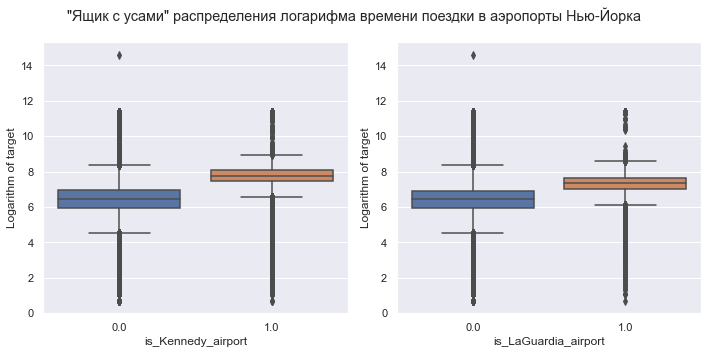

In [68]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2)
for i, feature in enumerate(['is_Kennedy_airport', 'is_LaGuardia_airport']):
    sns.boxplot(x=X_train_mod[feature], y=y_train, ax=axs[i])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Logarithm of target')
fig.suptitle(
    '"Ящик с усами" распределения логарифма времени поездки в аэропорты Нью-Йорка'
)
plt.tight_layout()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Думаю, что признаки в целом получились хорошими. Так как поездки в аэропорт и не в аэропорт, судя по графикам, имеют различные распределеия (медиана и разброс логарифма длительности поездки отличаются между поездкой в аэропорт и не в аэропорт), то есть добавленный признаки помогают особенности в данных.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

Воспользовавшись гугл картами, я определила оптимальные координаты рамочки:
* Левый нижний угол: 40.70370, -74.01949
* Правый нижний угол: 40.70370, -73.93454
* Левый верхний угол: 40.79835, -74.01949
* Правый верхний угол: 40.79835, -73.93454

Сделаю визуализацию этой рамочки, для этого воспользуюсь уже написанно выше функцией show_circles_on_map_my, добавив туда отрисовку этой рамочки:

In [69]:
def show_circles_on_map_my(data, latitude_column, longitude_column, color):
    boundary = [(40.70370, -74.01949),
                 (40.70370, -73.93454),
                 (40.79835, -73.93454),
                 (40.79835, -74.01949),
                 (40.70370, -74.01949)]
    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)


    for _, row in data.iterrows():
        folium.Circle(radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color, fill_color=color, fill=True).add_to(m)
    folium.Circle(radius=100,
            location=(data[latitude_column].mean(), data[longitude_column].mean()),
            color='red', fill_color='red', fill=True).add_to(m)
    
    folium.PolyLine(boundary, color='red', weight=2.5, opacity=1).add_to(m)

    return m

In [70]:
show_circles_on_map_my(data.sample(8000), "pickup_latitude", "pickup_longitude", "blue")

Рамочка получилась такой же, как на картинке в задании. То есть буду использовать эти координаты для определения границ.

Таким образом, у меня будет жеская сетка разбиения на квадраты, которая не зависит от подаваемой на вход выборки.

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, this=True):
        self.left_boundary_lgt = -74.01949
        self.right_boundary_lgt = -73.93454
        self.lower_boundary_lat = 40.70370
        self.upper_boundary_lat = 40.79835
        self.num_width = 30
        self.num_length = 60
        self.this = this
    
    def fit(self, X, pickup_lgt_col, pickup_lat_col, dropoff_lgt_col, dropoff_lat_col, y=None):
        self.p_lgt_col = pickup_lgt_col
        self.p_lat_col = pickup_lat_col
        self.d_lgt_col = dropoff_lgt_col
        self.d_lat_col = dropoff_lat_col
        self.width_step = (self.left_boundary_lgt - self.right_boundary_lgt) / self.num_width
        self.length_step = (self.upper_boundary_lat - self.lower_boundary_lat) / self.num_length
        return self
    
    def transform(self, X, y=None):
        X_new = X.copy()
        X_new['pickup_id'] = np.full(X.shape[0], -1)
        X_new['dropoff_id'] = np.full(X.shape[0], -1)
        
        # получение номера ячейки посадки
        p_mask = ((X[self.p_lgt_col] > self.left_boundary_lgt) &
                  (X[self.p_lgt_col] < self.right_boundary_lgt) &
                  (X[self.p_lat_col] > self.lower_boundary_lat) &
                  (X[self.p_lat_col] < self.upper_boundary_lat))
        p_lgt_split_num = ((self.left_boundary_lgt-X[self.p_lgt_col])/self.width_step).astype(int)
        p_lat_split_num = ((X[self.p_lat_col]-self.lower_boundary_lat)/self.length_step).astype(int)
        X_new.loc[p_mask,'pickup_id'] = (p_lat_split_num*self.num_width + p_lgt_split_num)*p_mask
        
        # получение номера ячейки высадки
        d_mask = ((X[self.d_lgt_col] > self.left_boundary_lgt) &
                  (X[self.d_lgt_col] < self.right_boundary_lgt) &
                  (X[self.d_lat_col] > self.lower_boundary_lat) &
                  (X[self.d_lat_col] < self.upper_boundary_lat))
        d_lgt_split_num = ((self.left_boundary_lgt-X[self.d_lgt_col])/self.width_step).astype(int)
        d_lat_split_num = ((X[self.d_lat_col]-self.lower_boundary_lat)/self.length_step).astype(int)
        X_new.loc[d_mask,'dropoff_id'] = (d_lat_split_num*self.num_width + d_lgt_split_num)*d_mask
        
        return X_new.copy()

In [72]:
transformer = MapGridTransformer()
X_train_mod = transformer.fit_transform(X=X_train_mod,
                                        pickup_lgt_col='pickup_longitude',
                                        pickup_lat_col='pickup_latitude',
                                        dropoff_lgt_col='dropoff_longitude',
                                        dropoff_lat_col='dropoff_latitude')
X_test_mod = transformer.transform(X=X_test_mod)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [73]:
X_train_mod.head(3)

id  vendor_id     pickup_datetime  passenger_count  \
203398  id3121553          2 2016-02-27 19:44:44                6   
828302  id1143974          2 2016-06-19 11:30:49                6   
962010  id2864809          2 2016-01-06 15:32:24                1   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
203398        -73.982658        40.771950         -73.984230   
828302        -73.968498        40.761299         -73.990143   
962010        -73.979851        40.781151         -73.967857   

        dropoff_latitude store_and_fwd_flag  day_of_week  ...  \
203398         40.763031                  N            5  ...   
828302         40.737228                  N            6  ...   
962010         40.787411                  N            2  ...   

        is_snowfall_period  is_airport_broke_period    haversine  \
203398                 0.0                      0.0  1000.514474   
828302                 0.0                      0.0  3238.568483   
962010                 0.0                      0.0  1226.440018   

        log_haversine  is_traffic_jams  is_free_roads  is_Kennedy_airport  \
203398       6.909269              1.0            0.0                 0.0   
828302       8.083195              1.0            0.0                 0.0   
962010       7.112686              0.0            0.0                 0.0   

        is_LaGuardia_airport  pickup_id  dropoff_id  
203398                   0.0       1303        1122  
828302                   0.0       1098         640  
962010                   0.0       1483        1608  

[3 rows x 23 columns]

Колонка haversine по сути не нужна, так как выше выяснилось, что лучше подойдёт колонка log_haversine, поэтому удалю haversine из датасета

In [74]:
X_train_mod = X_train_mod.drop('haversine', axis=1)

In [75]:
X_test_mod = X_test_mod.drop('haversine', axis=1)

В переменную cat_features запишу категориальные признаки, к которым нужно примернить OneHotEncoder, в переменную bin_features запишу категориальные признаки, которуе не нужно кодировать, так как они уже закодированы, в переменной num_features будут числовые признаки, к которым нужно применить StandardScaler.

In [76]:
bin_features = ['is_snowfall_period','is_airport_broke_period',
                'is_traffic_jams','is_free_roads',
                'is_Kennedy_airport','is_LaGuardia_airport']
cat_features = ['day_of_week','month','hour',
                'pickup_id', 'dropoff_id']
num_features = ['day_of_year_number', 'log_haversine']

In [77]:
column_transformer_second = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('scaling', StandardScaler(), num_features)
])

pipeline_second = Pipeline([
    ('column_transformer', column_transformer_second),
    ('ridge_reg', Ridge())
])

model_second = pipeline_second.fit(X_train_mod.loc[:,'day_of_week':],
                                   y_train)
y_pred_train_second = model_second.predict(
    X_train_mod.loc[:,'day_of_week':]
)
y_pred_test_second = model_second.predict(
    X_test_mod.loc[:,'day_of_week':]
)

print('Train RMSE: %.5f' % mean_squared_error(y_train, y_pred_train_second, squared=False))
print('Test RMSE: %.5f' % mean_squared_error(y_test, y_pred_test_second, squared=False))

Train RMSE: 0.51228
Test RMSE: 0.51053


Качество получилось значительно лучше, чем в первый раз.

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Признак passenger_count может быть полезным, так как возможно существует зависимость между количеством пассажиров и скоростью движения такси, так как для разного числа пассажиров могут приезжать на вызов разные типы машин.

Признак vendor_id кажется бесполезным, но всё же может оказаться, что заказы от одного поставщика могут исполняться быстрее, но если это так, то это скорее будет случайность.

Признак store_and_fwd_flag возможно связан с удалённостью такси от центра города, из-за чего может быть плохая связь с интернетом, то есть этот признак может быть связан с дальностью поездки. Хотя скорее всего, этот признак оказется бесполезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [78]:
len(X_train_mod.vendor_id.unique())

2

In [79]:
len(X_train_mod.passenger_count.unique())

10

In [80]:
len(X_train_mod.store_and_fwd_flag.unique())

2

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

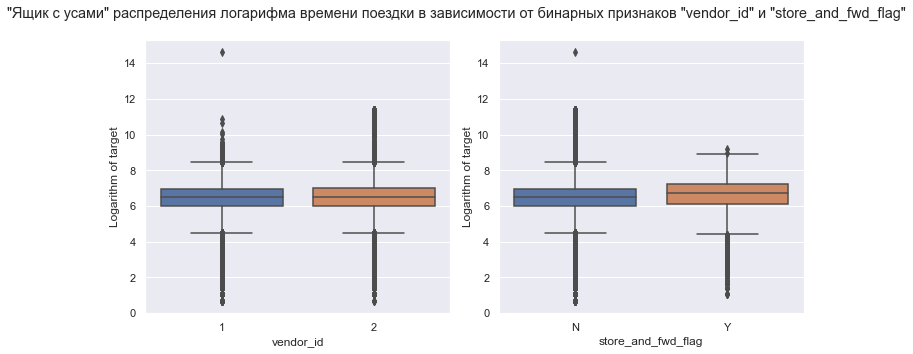

In [81]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2)
for i, feature in enumerate(['vendor_id', 'store_and_fwd_flag']):
    sns.boxplot(x=X_train_mod[feature], y=y_train, ax=axs[i])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Logarithm of target')
fig.suptitle(
    '"Ящик с усами" распределения логарифма времени поездки в зависимости от бинарных признаков "vendor_id" и "store_and_fwd_flag"'
)
plt.tight_layout()

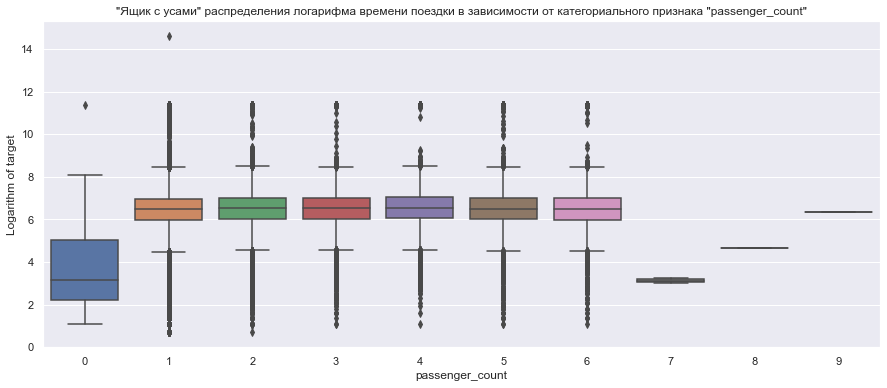

In [82]:
fig = plt.figure(figsize=(15,6))
sns.boxplot(x=X_train_mod['passenger_count'], y=y_train)
plt.title('"Ящик с усами" распределения логарифма времени поездки в зависимости от категориального признака "passenger_count"')
plt.ylabel('Logarithm of target')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [83]:
X_train_mod.vendor_id.unique()

array([2, 1], dtype=int64)

In [84]:
X_train_mod.loc[X_train_mod.vendor_id == 2, 'vendor_id'] = 0
X_test_mod.loc[X_test_mod.vendor_id == 2, 'vendor_id'] = 0

In [85]:
X_train_mod.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

In [86]:
X_train_mod.loc[X_train_mod.store_and_fwd_flag == 'N', 'store_and_fwd_flag'] = 0
X_train_mod.loc[X_train_mod.store_and_fwd_flag == 'Y', 'store_and_fwd_flag'] = 1
X_test_mod.loc[X_test_mod.store_and_fwd_flag == 'N', 'store_and_fwd_flag'] = 0
X_test_mod.loc[X_test_mod.store_and_fwd_flag == 'Y', 'store_and_fwd_flag'] = 1

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Кажется, что признаки vendor_id и store_and_fwd_flag не будут очень сильными для обучения, так как в этих признаках в целом одинаковое распределение логарифма длины поездки и для значения 0, и для значения 1, то есть каких то закономерностей эти признаки не отражают.

А вот признак passenger_count, может оказаться полезным для обучения, так как, хотя значения 1-6 показывают одинаковое распределение логарифма длительности поездки, остальные же значения признаков показывают различные распределения таргета, следовательно, эти признаки могут помочь модели найти закономерности в этих данных.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [87]:
X_train_mod.head(3)

id  vendor_id     pickup_datetime  passenger_count  \
203398  id3121553          0 2016-02-27 19:44:44                6   
828302  id1143974          0 2016-06-19 11:30:49                6   
962010  id2864809          0 2016-01-06 15:32:24                1   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
203398        -73.982658        40.771950         -73.984230   
828302        -73.968498        40.761299         -73.990143   
962010        -73.979851        40.781151         -73.967857   

        dropoff_latitude store_and_fwd_flag  day_of_week  ...  \
203398         40.763031                  0            5  ...   
828302         40.737228                  0            6  ...   
962010         40.787411                  0            2  ...   

        day_of_year_number  is_snowfall_period  is_airport_broke_period  \
203398                  58                 0.0                      0.0   
828302                 171                 0.0                      0.0   
962010                   6                 0.0                      0.0   

        log_haversine  is_traffic_jams  is_free_roads  is_Kennedy_airport  \
203398       6.909269              1.0            0.0                 0.0   
828302       8.083195              1.0            0.0                 0.0   
962010       7.112686              0.0            0.0                 0.0   

        is_LaGuardia_airport  pickup_id  dropoff_id  
203398                   0.0       1303        1122  
828302                   0.0       1098         640  
962010                   0.0       1483        1608  

[3 rows x 22 columns]

Наверное, это нужно было сделать давно, но удалю колонки id, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude и dropoff_latitude так как они уже не унжны и всё нужное из них уже извлечено.

In [88]:
X_train_mod = X_train_mod.drop(['id', 'pickup_datetime',
                                'pickup_longitude', 'pickup_latitude',
                                'dropoff_longitude', 'dropoff_latitude'], axis=1)

In [89]:
X_test_mod = X_test_mod.drop(['id', 'pickup_datetime',
                              'pickup_longitude', 'pickup_latitude',
                              'dropoff_longitude', 'dropoff_latitude'], axis=1)

In [90]:
X_train_mod.head(3)

vendor_id  passenger_count store_and_fwd_flag  day_of_week  month  \
203398          0                6                  0            5      2   
828302          0                6                  0            6      6   
962010          0                1                  0            2      1   

        hour  day_of_year_number  is_snowfall_period  is_airport_broke_period  \
203398    19                  58                 0.0                      0.0   
828302    11                 171                 0.0                      0.0   
962010    15                   6                 0.0                      0.0   

        log_haversine  is_traffic_jams  is_free_roads  is_Kennedy_airport  \
203398       6.909269              1.0            0.0                 0.0   
828302       8.083195              1.0            0.0                 0.0   
962010       7.112686              0.0            0.0                 0.0   

        is_LaGuardia_airport  pickup_id  dropoff_id  
203398                   0.0       1303        1122  
828302                   0.0       1098         640  
962010                   0.0       1483        1608

In [91]:
bin_features = ['is_snowfall_period','is_airport_broke_period',
                'is_traffic_jams','is_free_roads',
                'is_Kennedy_airport','is_LaGuardia_airport',
                'vendor_id', 'store_and_fwd_flag']
cat_features = ['day_of_week','month','hour',
                'pickup_id','dropoff_id','passenger_count']
num_features = ['day_of_year_number', 'log_haversine']

In [92]:
column_transformer_third = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('scaling', StandardScaler(), num_features)
])

pipeline_third = Pipeline([
    ('column_transformer', column_transformer_third),
    ('ridge_reg', Ridge())
])

model_third = pipeline_third.fit(X_train_mod, y_train)
y_pred_train_third = model_third.predict(X_train_mod)
y_pred_test_third = model_third.predict(X_test_mod)

print('Train RMSE: %.5f' % mean_squared_error(y_train, y_pred_train_third, squared=False))
print('Test RMSE: %.5f' % mean_squared_error(y_test, y_pred_test_third, squared=False))

Train RMSE: 0.51189
Test RMSE: 0.51027


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Так как изменения в качестве вообще не наблюдается, то удалю эти признаки:

In [93]:
X_train_mod = X_train_mod.drop(['vendor_id','passenger_count','store_and_fwd_flag'],axis=1)
X_test_mod = X_test_mod.drop(['vendor_id','passenger_count','store_and_fwd_flag'],axis=1)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

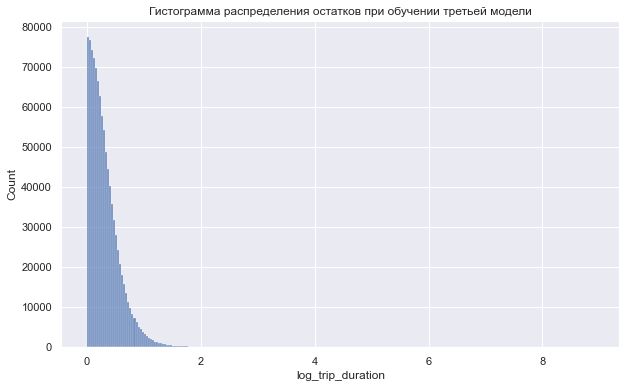

In [94]:
fig = plt.figure(figsize=(10,6))
sns.histplot(np.abs(y_train - y_pred_train_third), bins=250)
plt.title('Гистограмма распределения остатков при обучении третьей модели')
plt.show()

In [95]:
np.exp(7) / 60

18.277219307140975

Выкину из обучающей выборки объекты, на которых остатки регрессии больше 7, так как это означает, что модель ошиблась на 18.28 минуты, что слишком уж много для данной задачи.

In [96]:
mask = (np.abs(y_train - y_pred_train_third) >= 6)
mask.sum()

31

Всего один такой объект будет удалён.

In [97]:
X_train_mod = X_train_mod.loc[~mask]
y_train = y_train.loc[~mask]

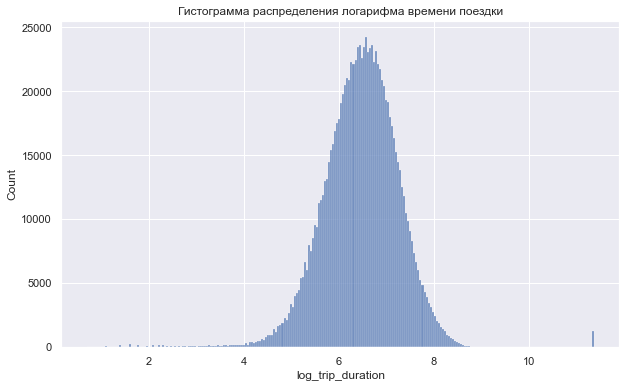

In [98]:
fig = plt.figure(figsize=(10,6))
sns.histplot(y_train, bins=250)
plt.title('Гистограмма распределения логарифма времени поездки')
plt.show()

Есть поездки, логарифм длительности которых составляет меньше 3, то есть

In [99]:
print(np.exp(3))

20.085536923187668


поездка длилась всего 20 секунд. Удалю из обучающей выборки объекты, у которых логарифм таргета меньше 3-х.

In [100]:
mask = (y_train <= 3)
mask.sum()

2477

Получается, что всего удаляю 2477 объектов

In [101]:
X_train_mod = X_train_mod.loc[~mask]
y_train = y_train.loc[~mask]

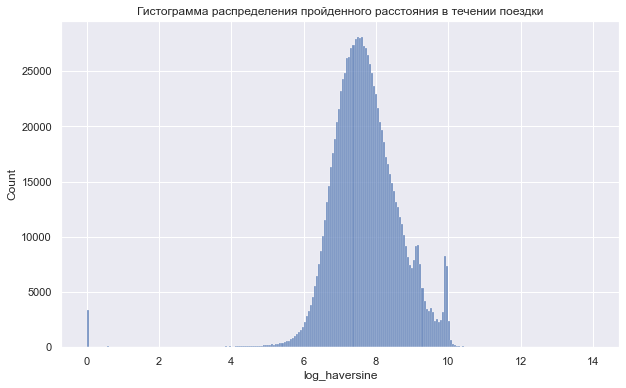

In [102]:
fig = plt.figure(figsize=(10,6))
sns.histplot(X_train_mod.log_haversine, bins=250)
plt.title('Гистограмма распределения пройденного расстояния в течении поездки')
plt.show()

In [103]:
np.exp(11.5) / 1000

98.71577101076049

Кажется, поездок в такси на расстояние больше 100 км не бывает в нашем мире, поэтому буду считать это за выбросы и удалю из выборки

In [104]:
mask = (X_train_mod.log_haversine >= 11.5)
mask.sum()

15

Всего таких выбросов получается 15 штук

In [105]:
X_train_mod = X_train_mod.loc[~mask]
y_train = y_train.loc[~mask]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [106]:
X_train_mod.head(3)

day_of_week  month  hour  day_of_year_number  is_snowfall_period  \
203398            5      2    19                  58                 0.0   
828302            6      6    11                 171                 0.0   
962010            2      1    15                   6                 0.0   

        is_airport_broke_period  log_haversine  is_traffic_jams  \
203398                      0.0       6.909269              1.0   
828302                      0.0       8.083195              1.0   
962010                      0.0       7.112686              0.0   

        is_free_roads  is_Kennedy_airport  is_LaGuardia_airport  pickup_id  \
203398            0.0                 0.0                   0.0       1303   
828302            0.0                 0.0                   0.0       1098   
962010            0.0                 0.0                   0.0       1483   

        dropoff_id  
203398        1122  
828302         640  
962010        1608

In [107]:
print(X_train_mod.is_snowfall_period.sum())
print(X_train_mod.is_airport_broke_period.sum())
print(X_train_mod.is_traffic_jams.sum())
print(X_train_mod.is_free_roads.sum())
print(X_train_mod.is_Kennedy_airport.sum())
print(X_train_mod.is_LaGuardia_airport.sum())

7751.0
8364.0
380848.0
18923.0
30211.0
47112.0


С признаками связанными со временем точно всё хорошо, они не редкие. Признаки, рассмотренные выше тоже нельзя назвать редкими. Осталось посмотреть на категории признаков pickup_id и dropoff_id.

In [108]:
len(X_train_mod.pickup_id.unique())

1258

Сейчас сущевтвует 1258 различных квадратов начала поездки, это всё будут разные категории после ohe.

In [109]:
tmp = pd.DataFrame(
    {'group_size': X_train_mod.groupby(by='pickup_id').size()}
).reset_index()
tmp[tmp.group_size <= 15].shape[0]

337

То есть существует целых 337 квадратов, из которых поездки совершались 15 или менее раз, думаю, что если признак встречается всего 15 раз в выборке с более миллионом объектов, то есго можно считать редким, поэтому объединю такие квадраты в группы, в зависимости от расположения.

In [110]:
rare_pickup_square = tmp[tmp.group_size <= 15]['pickup_id'].unique()

Такие редкие квадраты объединю по следующему принципу: разобью эту жосткую сетку, которую я задавала в MapGridTransformer всего на 8 частей (напополам по вертикали и на 4 части по горизонтали) и в каждом из этих больших квадратов объединю редкие категории в одну. Назову эти новые категории так: 1800, 1801, ..., 1807.

In [111]:
bins = np.array([0, 450, 900, 1350, 1800])  # это разбиение по горизонтали на 4 части
horizontal_cats = np.digitize(rare_pickup_square, bins)
vertical_cats = (rare_pickup_square / 15).astype(int) % 2
new_cats = 1800 + (horizontal_cats - 1) * 2 + vertical_cats

trans_cats = dict(zip(rare_pickup_square, new_cats))

In [112]:
X_train_mod.loc[
    X_train_mod.pickup_id.isin(rare_pickup_square),
    'pickup_id'
] = X_train_mod.loc[X_train_mod.pickup_id.isin(rare_pickup_square),'pickup_id'].map(trans_cats)

Такую же трансформацию проделаю для тестовой выборки

In [113]:
X_test_mod.loc[
    X_test_mod.pickup_id.isin(rare_pickup_square),
    'pickup_id'
] = X_test_mod.loc[X_test_mod.pickup_id.isin(rare_pickup_square),'pickup_id'].map(trans_cats)

In [114]:
len(X_train_mod.pickup_id.unique())

929

Теперь всего 929 различных категорий посадки существует, получилось уменьшить на четверть число новых признаков.

Повторю всё тоже самое для колонки dropoff_id

In [115]:
len(X_train_mod.dropoff_id.unique())

1339

In [116]:
tmp = pd.DataFrame(
    {'group_size': X_train_mod.groupby(by='dropoff_id').size()}
).reset_index()
tmp[tmp.group_size <= 15].shape[0]

253

In [117]:
rare_dropoff_square = tmp[tmp.group_size <= 15]['dropoff_id'].unique()
bins = np.array([0, 450, 900, 1350, 1800])  # это разбиение по горизонтали на 4 части
horizontal_cats = np.digitize(rare_dropoff_square, bins)
vertical_cats = (rare_dropoff_square / 15).astype(int) % 2
new_cats = 1800 + (horizontal_cats - 1) * 2 + vertical_cats

trans_cats = dict(zip(rare_dropoff_square, new_cats))

In [118]:
X_train_mod.loc[
    X_train_mod.pickup_id.isin(rare_dropoff_square),
    'dropoff_id'
] = X_train_mod.loc[X_train_mod.pickup_id.isin(rare_dropoff_square),'dropoff_id'].map(trans_cats)

X_test_mod.loc[
    X_test_mod.pickup_id.isin(rare_dropoff_square),
    'dropoff_id'
] = X_test_mod.loc[X_test_mod.pickup_id.isin(rare_dropoff_square),'dropoff_id'].map(trans_cats)

In [119]:
len(X_train_mod.pickup_id.unique())

929

Так же получилось снизить количество категорий с 1339 до 929.

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [120]:
X_train_mod.head(3)

day_of_week  month  hour  day_of_year_number  is_snowfall_period  \
203398            5      2    19                  58                 0.0   
828302            6      6    11                 171                 0.0   
962010            2      1    15                   6                 0.0   

        is_airport_broke_period  log_haversine  is_traffic_jams  \
203398                      0.0       6.909269              1.0   
828302                      0.0       8.083195              1.0   
962010                      0.0       7.112686              0.0   

        is_free_roads  is_Kennedy_airport  is_LaGuardia_airport  pickup_id  \
203398            0.0                 0.0                   0.0       1303   
828302            0.0                 0.0                   0.0       1098   
962010            0.0                 0.0                   0.0       1483   

        dropoff_id  
203398      1122.0  
828302       640.0  
962010      1608.0

In [121]:
bin_features = ['is_snowfall_period','is_airport_broke_period',
                'is_traffic_jams','is_free_roads',
                'is_Kennedy_airport','is_LaGuardia_airport']
cat_features = ['day_of_week','month','hour',
                'pickup_id','dropoff_id']
num_features = ['day_of_year_number', 'log_haversine']

column_transformer_third = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('scaling', StandardScaler(), num_features)
])

pipeline_third = Pipeline([
    ('column_transformer', column_transformer_third),
    ('ridge_reg', Ridge())
])

model_third = pipeline_third.fit(X_train_mod, y_train)
y_pred_train_third = model_third.predict(X_train_mod)
y_pred_test_third = model_third.predict(X_test_mod)

print('Train RMSE: %.5f' % mean_squared_error(y_train, y_pred_train_third, squared=False))
print('Test RMSE: %.5f' % mean_squared_error(y_test, y_pred_test_third, squared=False))

Train RMSE: 0.50548
Test RMSE: 0.51073


Получилось, что на отчищеных данных качество на тренировочной выборке улучшилось, но незначительно, при этом на тестовой выборке качество незначительно ухудшилось.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [122]:
print('Количество признаков до OneHot-кодирования: ', X_train_mod.shape[1])

Количество признаков до OneHot-кодирования:  13


In [123]:
cat_features = ['day_of_week','month','hour',
                'pickup_id','dropoff_id']
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_features),
])

print('Количество признаков после OneHot-кодирования: ',
      column_transformer.fit_transform(X_train_mod).shape[1])

Количество признаков после OneHot-кодирования:  2307


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [124]:
from sklearn.linear_model import Lasso

In [125]:
bin_features = ['is_snowfall_period','is_airport_broke_period',
                'is_traffic_jams','is_free_roads',
                'is_Kennedy_airport','is_LaGuardia_airport']
cat_features = ['day_of_week','month','hour',
                'pickup_id','dropoff_id']
num_features = ['day_of_year_number', 'log_haversine']

column_transformer_lasso = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('scaling', StandardScaler(), num_features)
])

pipeline_lasso = Pipeline([
    ('column_transformer', column_transformer_lasso),
    ('lasso_reg', Lasso())
])

model_lasso = pipeline_lasso.fit(X_train_mod, y_train)
y_pred_train_lasso = model_lasso.predict(X_train_mod)
y_pred_test_lasso = model_lasso.predict(X_test_mod)

print('Train RMSE: %.5f' % mean_squared_error(y_train, y_pred_train_lasso, squared=False))
print('Test RMSE: %.5f' % mean_squared_error(y_test, y_pred_test_lasso, squared=False))

Train RMSE: 0.76748
Test RMSE: 0.79520


Lasso-регрессия дала результат гораздо хуже по сравнению с Ridge-регрессией.

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [126]:
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train_mod,
                                                      y_train,
                                                      test_size=0.2,
                                                      random_state=12345)

In [127]:
cat_features = ['day_of_week','month','hour',
                'pickup_id','dropoff_id']
num_features = ['day_of_year_number', 'log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('scaling', StandardScaler(), num_features)
])

In [128]:
alphas = np.logspace(-6, 2, 20)
val_errors = []
for i, alpha_ in enumerate(alphas):
    pipeline = Pipeline([
        ('column_transformer', column_transformer),
        ('ridge_reg', Ridge(alpha=alpha_))
    ])
    model = pipeline.fit(X_train_v, y_train_v)
    val_errors.append(mean_squared_error(y_val,
                                         model.predict(X_val),
                                         squared=False))
    print(i, 'alpha=', alpha_, 'avalidation error= %.6f' % val_errors[-1])

0 alpha= 1e-06 avalidation error= 0.509296
1 alpha= 2.6366508987303555e-06 avalidation error= 0.509296
2 alpha= 6.951927961775606e-06 avalidation error= 0.509295
3 alpha= 1.8329807108324375e-05 avalidation error= 0.509299
4 alpha= 4.8329302385717524e-05 avalidation error= 0.509324
5 alpha= 0.00012742749857031334 avalidation error= 0.509297
6 alpha= 0.0003359818286283781 avalidation error= 0.509294
7 alpha= 0.0008858667904100823 avalidation error= 0.509296
8 alpha= 0.002335721469090121 avalidation error= 0.509298
9 alpha= 0.00615848211066026 avalidation error= 0.509323
10 alpha= 0.01623776739188721 avalidation error= 0.509295
11 alpha= 0.04281332398719396 avalidation error= 0.509324
12 alpha= 0.11288378916846883 avalidation error= 0.509296
13 alpha= 0.2976351441631313 avalidation error= 0.509322
14 alpha= 0.7847599703514607 avalidation error= 0.509291
15 alpha= 2.06913808111479 avalidation error= 0.509287
16 alpha= 5.455594781168514 avalidation error= 0.509271
17 alpha= 14.3844988828766

Странно, что ошибка практически не меняется при изменении альфа, хотя альфа меняется очень сильно

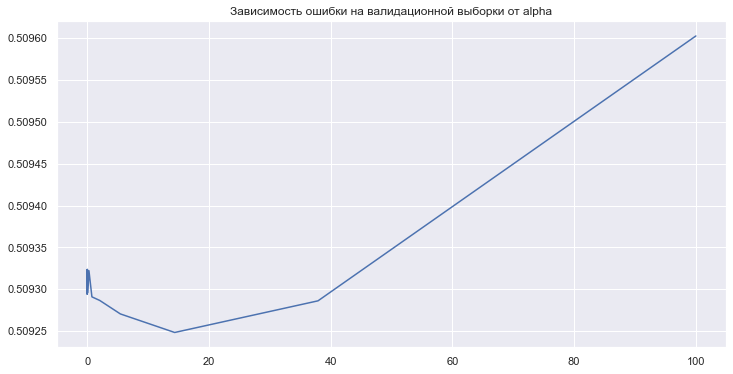

In [129]:
fig = plt.figure(figsize=(12,6))
plt.plot(alphas, val_errors)
plt.title('Зависимость ошибки на валидационной выборки от alpha')
plt.show()

Получилось, что лучшим альфа будет:

In [130]:
alphas[17]

14.384498882876601

In [131]:
pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('ridge_reg', Ridge(alpha=alphas[17]))
])
model = pipeline.fit(X_train_v, y_train_v)
print('Test error= %.6f' % mean_squared_error(y_test, model.predict(X_test_mod), squared=False))

Test error= 0.510864


Результат практически не изменился

In [150]:
alphas = np.logspace(-4, 1, 10)
val_errors = []
coefs = []
for i, alpha_ in enumerate(alphas):
    pipeline = Pipeline([
        ('column_transformer', column_transformer),
        ('lasso_reg', Lasso(alpha=alpha_))
    ])
    model = pipeline.fit(X_train_v, y_train_v)
    val_errors.append(mean_squared_error(y_val,
                                         model.predict(X_val),
                                         squared=False))
    coefs.append((model.named_steps['lasso_reg'].coef_ == 0).sum())
    print(i, 'alpha=', alpha_, 'avalidation error= %.6f' % val_errors[-1])

0 alpha= 0.0001 avalidation error= 0.515500
1 alpha= 0.00035938136638046257 avalidation error= 0.524748
2 alpha= 0.001291549665014884 avalidation error= 0.528747
3 alpha= 0.004641588833612782 avalidation error= 0.540206
4 alpha= 0.016681005372000592 avalidation error= 0.548126
5 alpha= 0.05994842503189409 avalidation error= 0.551906
6 alpha= 0.21544346900318845 avalidation error= 0.590020
7 alpha= 0.7742636826811278 avalidation error= 0.770588
8 alpha= 2.782559402207126 avalidation error= 0.770588
9 alpha= 10.0 avalidation error= 0.770588


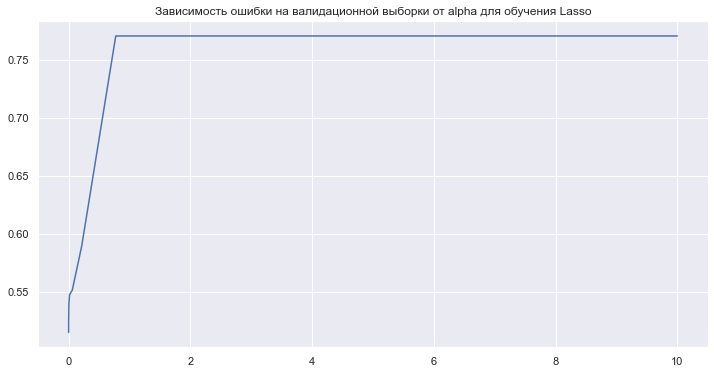

In [151]:
fig = plt.figure(figsize=(12,6))
plt.plot(alphas, val_errors)
plt.title('Зависимость ошибки на валидационной выборки от alpha для обучения Lasso')
plt.show()

К сожалению, чем меньше выбирать альфа для обучения Lasso, тем дольше учится модель, таким образом, когда я пыталась обучать модельна альфа = 0.00001, у меня модель училась больше 40 минут и приэтом завис компьютер и так случилось несколько раз, поэтому попробовать альфа меньшие, чем 0.0001, и найти реальный минимум ошибки на валидационной выборке, для меня не представляется возможным, поэтому буду использовать альфу:

In [152]:
alphas[0]

0.0001

In [153]:
pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('lasso_reg', Lasso(alpha=alphas[0]))
])
model = pipeline.fit(X_train_v, y_train_v)
print('Test error= %.6f' % mean_squared_error(y_test, model.predict(X_test_mod), squared=False))

Test error= 0.516823


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

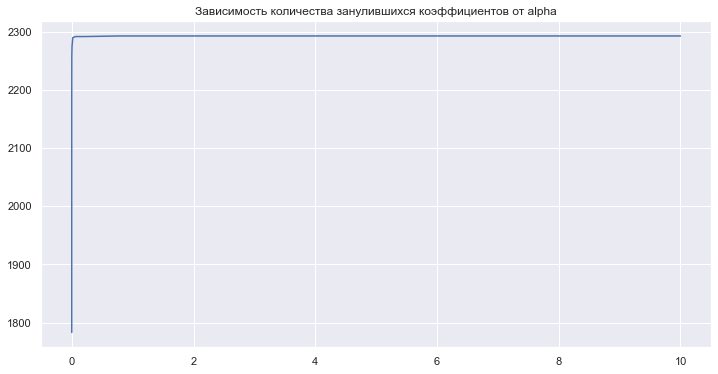

In [154]:
fig = plt.figure(figsize=(12,6))
plt.plot(alphas, coefs)
plt.title('Зависимость количества занулившихся коэффициентов от alpha')
plt.show()

In [156]:
(model.named_steps['lasso_reg'].coef_ == 0).sum()

1783

Так как всего у нас 2307 признаков, то половина это 1154, как видно, при том альфа, который был выбран мною как лучший, как раз зануляется больше половины признаков, то есть никакое качество терять не нужно, чтобы этого добиться.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [157]:
X_train_mod.head(3)

day_of_week  month  hour  day_of_year_number  is_snowfall_period  \
203398            5      2    19                  58                 0.0   
828302            6      6    11                 171                 0.0   
962010            2      1    15                   6                 0.0   

        is_airport_broke_period  log_haversine  is_traffic_jams  \
203398                      0.0       6.909269              1.0   
828302                      0.0       8.083195              1.0   
962010                      0.0       7.112686              0.0   

        is_free_roads  is_Kennedy_airport  is_LaGuardia_airport  pickup_id  \
203398            0.0                 0.0                   0.0       1303   
828302            0.0                 0.0                   0.0       1098   
962010            0.0                 0.0                   0.0       1483   

        dropoff_id  
203398      1122.0  
828302       640.0  
962010      1608.0

In [203]:
tmp = pd.DataFrame(
    {'size': X_train_mod.groupby(by=['pickup_id', 'dropoff_id']).size()}
).reset_index()

tmp = tmp.sort_values(by='size', ascending=False)
tmp = tmp.iloc[1:101, :]
tmp['new_cat'] = np.arange(100).reshape(100, 1)
tmp

pickup_id  dropoff_id  size  new_cat
159371       1000        -1.0   833        0
277573       1726        -1.0   812        1
174413       1061        -1.0   643        2
131970        879        -1.0   617        3
24130         280        -1.0   558        4
...           ...         ...   ...      ...
237484       1363        -1.0   264       95
819            -1      1092.0   264       96
5975           65        -1.0   262       97
272054       1635        -1.0   262       98
212043       1212        -1.0   261       99

[100 rows x 4 columns]

Не успела доделать эту задачу((((

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.